In [1]:
from datasets import load_dataset
import pandas as pd
import ast

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\maitp\anaconda3\envs\PYTHON_PROJECT_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

In [4]:
# Only get data analyst jobs in the US
df_DA_US = df.loc[
    (df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")
].copy()
df_DA_US.dropna(subset="salary_year_avg", inplace=True)
df_DA_US = df_DA_US.explode("job_skills")

In [5]:
# Group by job_skills for plotting
df_DA_US_skills = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(
    ["count", "median"]
)

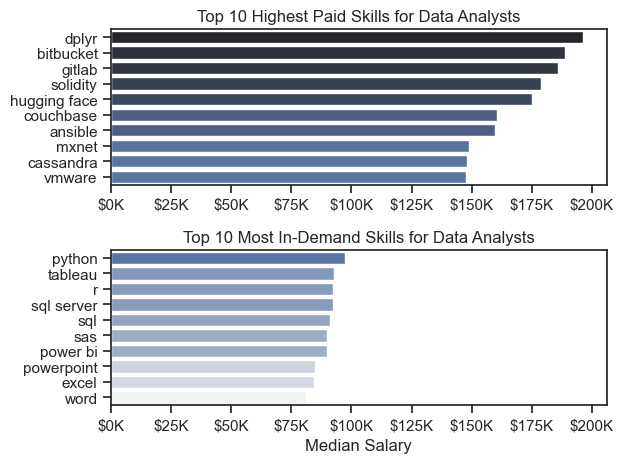

In [12]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")
sort_values = {"median": "Highest Paid", "count": "Most In-Demand"}
palettes = ["dark:b_r", "light:b"]

for i, (sort_value, title) in enumerate(sort_values.items()):
    df_DA_US_plot = df_DA_US_skills.sort_values(sort_value, ascending=False).head(10)
    df_DA_US_plot.sort_values("median", ascending=False, inplace=True)
    sns.barplot(
        data=df_DA_US_plot,
        x="median",
        y="job_skills",
        ax=ax[i],
        hue="median",
        palette=palettes[i],
        legend=None,
    )
    ax[i].set_ylabel(None)
    ax[i].set_title(f"Top 10 {title} Skills for Data Analysts")
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
ax[0].set_xlabel(None)
ax[1].set_xlabel("Median Salary")
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()

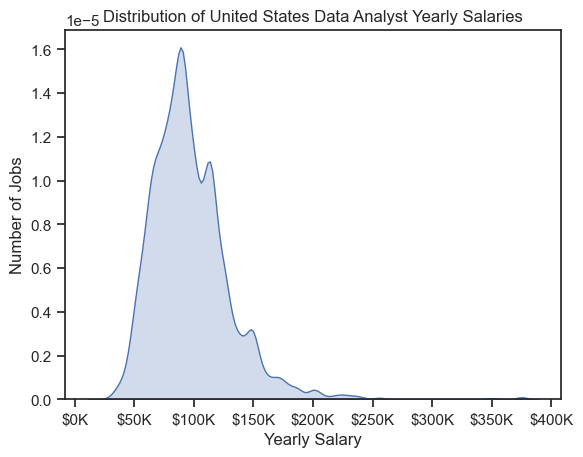

In [7]:
sns.kdeplot(data=df_DA_US["salary_year_avg"], fill=True)
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

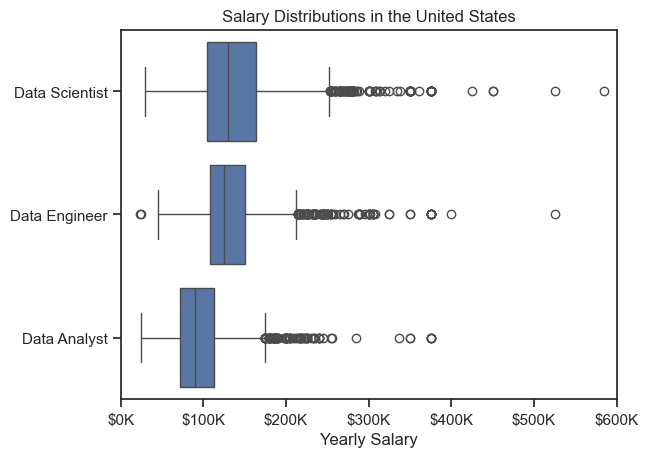

In [8]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]
df_US = df.loc[
    (df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")
].copy()
df_US.dropna(subset="salary_year_avg", inplace=True)

sns.boxplot(
    data=df_US, x="salary_year_avg", y="job_title_short", order=job_titles[::-1]
)
plt.xlabel("Yearly Salary")
plt.ylabel(None)
plt.title("Salary Distributions in the United States")
plt.xlim(0, 600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))